# Anscombe's Quartet
This is a classic example to demonstrate how summary statistics are now enough to have an overview of a dataset. They are four datasets which share the same summary statistics but when plotted show a completely different picture.

First, we import all the libraries we need.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
# from tabulate import tabulate

import matplotlib.pyplot as plt
%matplotlib inline

Let's get some information about the dataset, the variables, their values, etc.

In [17]:
# load the dataset from https://github.com/mwaskom/seaborn-data/{name}.csv
df = sns.load_dataset('anscombe')
df.columns

Index(['dataset', 'x', 'y'], dtype='object')

In [18]:
# stats about numerical variables

df.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [19]:
# stats about nominal variables

# with df.dscribe(include = ['O']) it pulls out the objects dtypes attributes and shows their count/frequency/max/quartiles
# therefore the 'O' is used to indicate the word 'object', it isn't used to search the words containig the word 'O'
df.describe(include=['O'])

,dataset
count,44
unique,4
top,I
freq,11


In [20]:
# group the data according to the dataset and then plot mean, variance

summary = df.groupby('dataset').agg([np.mean, np.var]).transpose()
summary

dataset          I         II       III         IV
x mean    9.000000   9.000000   9.00000   9.000000
  var    11.000000  11.000000  11.00000  11.000000
y mean    7.500909   7.500909   7.50000   7.500909
  var     4.127269   4.127629   4.12262   4.123249

In [21]:
# and correlation

# this snippet basically computes the correlation between items in the dataset
# the parameters are just indications to iterate the computation for every dataset and to compute the correlation only for the parameter x
# what does the parameter [1] stand for?
groups = df.groupby('dataset')
corr = [g.corr()['x'][1] for _, g in groups]
corr

[0.8164205163448399,
 0.8162365060002427,
 0.8162867394895984,
 0.8165214368885028]

The four datasets (I, II, III and IV) are practically identical from the viewpoint of basic summary statistics, but if we check for instance the median values something start to change and if we plot them we get a completely different picture.

And so, what does it mean if the datasets have the same statistics but the plot of the median completely different?
I think that the key of reading here is that the basic description of the dataset that we have seen aren't enough to study it, since there are also other factors to consider in order to really understand a dataset

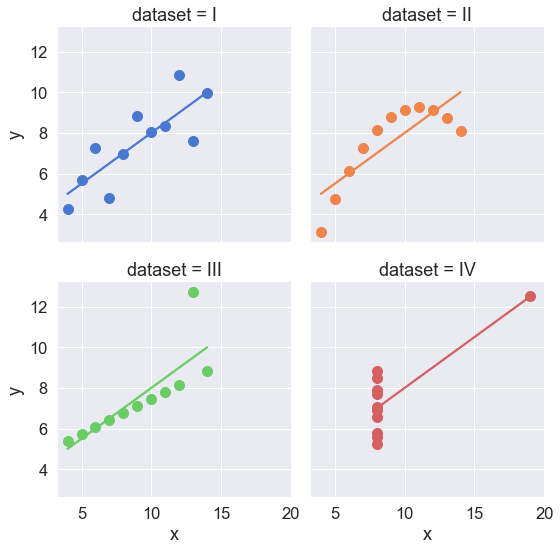

In [22]:
sns.set(font_scale=1.5)
g = sns.lmplot(x="x", y="y", col="dataset",
            hue="dataset", data=df,
            col_wrap=2, ci=None, palette="muted", height=4,
            scatter_kws={"s": 100, "alpha": 1})
g.set(xticks=np.arange(5,21,5));
